In [226]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fmin, minimize
import random

import matplotlib.patches as mpatches


# Generate the data

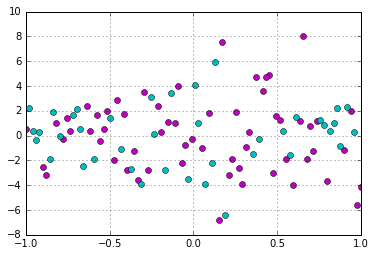

In [261]:
# x_all = np.array([ 0.1       ,  0.56666667,  1.03333333,  1.5       ,  1.96666667,2.43333333,  2.9       ])
# y_all = np.array([ 3.13640523,  1.83109539,  1.31565158,  0.77591068,  1.40453358,1.77338332,  3.05500884])
def gen_data(num):
    x_all = np.linspace(-1.0, 1.0, num=num)
    np.random.shuffle(x_all)
    y_all = .01*x_all-.09*x_all**2+.08*x_all**3-.0003*x_all**4-.08*x_all**5+0.0900*x_all**6 + 1*np.random.normal(loc=0.0, scale=3.0, size=num)

    x_all *= 1
    y_all *= 1
    
    separator = int(len(x_all) * 0.6)
    
    x_train = x_all[:separator]
    y_train = y_all[:separator]
    x_test = x_all[separator:]
    y_test = y_all[separator:]
    
    return (x_train,y_train),(x_test,y_test)

(x_train,y_train),(x_test,y_test) = gen_data(100)
plt.plot(x_train, y_train, 'mo')
plt.plot(x_test, y_test, 'co')

plt.grid(True)

# Define simple LinearRegression class & transform function
which might be too simple to use in our application

In [253]:
def toNDegree(x,n):
    ret = np.zeros((len(x),n))
    for i in range(n):
        ret[:,i] = x**i
    return ret

class LinearRegression:
    
    def __init__(self, x, y):
        self.minx = np.amin(x)
        self.maxx = np.amax(x)
        self.px = x
        self.y = y
        self.ndata = len(self.px)

    def cost(self, w):
        sum1 = 0.0
        sum2 = 0.0
        
        oneover2n = (0.5*1/float(self.ndata))
        
        for i in xrange(self.ndata):
            sum1 += (np.dot(w, self.px[i]) - self.y[i])**4
        sum1 *= oneover2n
            
        for i in range(1, len(w)):
            sum2 += w[i]**2
            
        sum2 *= self.lamb
        
        return sum1 + sum2

    def drawlinepara(self):
        x = np.linspace(-1, 1, 100)
        y = self.w[0]+(self.w[1]*x) + (self.w[2]*(x**2))
        plt.plot(x, y, 'r')
        
    def drawlinepoly(self, color = 'c', alp = 1):
        x = np.linspace(-1, 1, 100)
        y = np.zeros(100)
        for i in range(nb_degree):
            y += self.w[i]*(x**i)
            
        plt.plot(x, y, color, alpha=alp,linewidth=2.0)
        
    def set_w(self, w):
        self.w = w
    
    def set_nb_degree(self, nb_degree):
        self.nb_degree = nb_degree
    
    def set_lamb(self, lamb):
        self.lamb = lamb

# Draw 3 graph
 - the parabola one
 - the one that is too complex and should cause overfitting

minimize for para [-0.01617799  0.00964817 -0.00772921]
minimize for poly [-0.0146122   0.00870701 -0.00697684  0.00466931 -0.00395384  0.00284726
 -0.00247954  0.00189044]


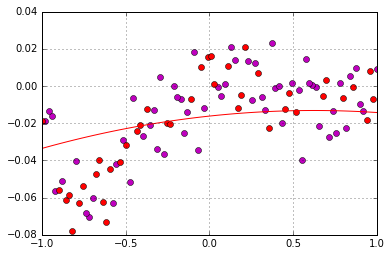

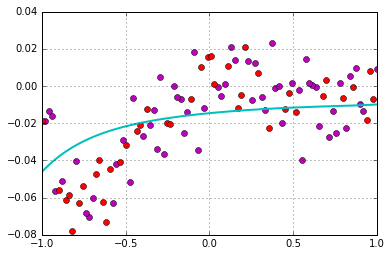

In [254]:
plt.plot(x_train, y_train, 'mo')
plt.plot(x_test, y_test, 'ro')
plt.grid(True)

l = LinearRegression(toNDegree(x_train,3), y_train)
l.set_lamb(0)

res = minimize(l.cost, np.zeros(3))
print 'minimize for para', res.x

l.set_w(res.x)
l.drawlinepara()
######################

nb_degree = 8

plt.figure()
plt.plot(x_train, y_train, 'mo')
plt.plot(x_test, y_test, 'ro')
plt.grid(True)

l2 = LinearRegression(toNDegree(x_train,nb_degree), y_train)
l2.set_lamb(0)
l2.set_nb_degree(nb_degree)

res2 = minimize(l2.cost, np.zeros(nb_degree))
print 'minimize for poly', res2.x

l2.set_w(res2.x)
l2.drawlinepoly()

overfitted_weight = res2.x

# Original Equation, MSE
then we take derivative of L respect to W to find the influence of L on w vector  
$$ L = \frac{1}{2n}\sum_{i=1}^n(w^Tx_i-y_i)^2+\lambda\sum_{i=1}^nw_i^2 \\ $$
$$ \frac{\partial L}{\partial wi}=0$$

### The equation that is $\hat{y}$-$y$
$$ L = \frac{1}{2n}\sum_{i=1}^n(w^Tx_i-y_i)^2+\lambda\sum_{i=1}^nw_i^2;\frac{\partial L}{\partial wi}=0\\ $$
$$
\begin{align}
\frac{2}{2n}\sum_{i=1}^n(w^Tx_i-y_i)\sum_{i=1}^n(x_i) + 2\lambda\sum_{i=1}^n(w_i) & = 0 \\
\frac{1}{n}\sum_{i=1}^n(w^Tx_i-y_i)\sum_{i=1}^n(x_i) & = -2\lambda\sum_{i=1}^n(w_i) \\
\frac{\sum_{i=1}^n(w^Tx_i-y_i)\sum_{i=1}^n(x_i)}{2n\sum_{i=1}^n(w_i)} &= -\lambda
\end{align}
$$


# Define solve_for_lambda function
which is the function what does exactly the same as the above equation to find the lambda  

In [176]:
def calc_lambda(x,y,w,n):   
    sum_yreal_predict = 0.0
    sum_px = 0.0
    sum_w = 0.0
    lamb = 0.0
    ndata = len(x)
    px = toNDegree(x,n)
    for i in xrange(ndata):
        sum_yreal_predict += (np.dot(w, px[i]) - y[i])
        sum_px += sum(px[i,:])
    sum_yreal_predict *= sum_px
    for i in xrange(len(w)):
        sum_w += w[i]**2
    sum_w *= 2*ndata
    lamb = (sum_yreal_predict/sum_w)
    return lamb #if lamb > 0 else -1*lamb

# Use the weight from the overfitting model to train with expected lambda in this model then plot

expected lamb =  -337.690434337
minimize for poly [-6.32243263  4.22948395 -2.55249834  2.48684984 -1.24651437  1.69978945
 -0.6093156   1.28613179]


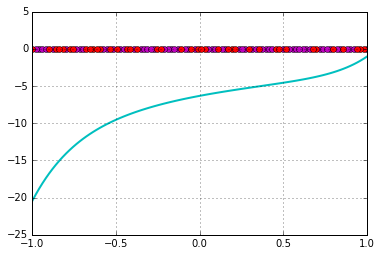

In [256]:
plt.figure()
plt.plot(x_train, y_train, 'mo')
plt.plot(x_test, y_test, 'ro')
plt.grid(True)

expected_lamb = calc_lambda(x_train, y_train, overfitted_weight, nb_degree)
print "expected lamb = ", expected_lamb

l3 = LinearRegression(toNDegree(x_train,nb_degree), y_train)
l3.set_lamb(expected_lamb)
l3.set_nb_degree(nb_degree)

res3 = minimize(l3.cost, np.zeros(nb_degree))
print 'minimize for poly', res3.x

l3.set_w(res3.x)
l3.drawlinepoly()

# Futher compute another lambda using the weight from l4
should not work as we expected

expected lamb =  -337.690434337
minimize for poly [-6.32243263  4.22948395 -2.55249834  2.48684984 -1.24651437  1.69978945
 -0.6093156   1.28613179]


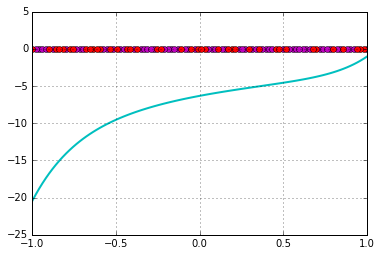

In [257]:
plt.figure()
plt.plot(x_train, y_train, 'mo')
plt.plot(x_test, y_test, 'ro')
plt.grid(True)

expected_lamb = calc_lambda(x_train, y_train, overfitted_weight, nb_degree)
print "expected lamb = ", expected_lamb

l4 = LinearRegression(toNDegree(x_train,nb_degree), y_train)
l4.set_lamb(expected_lamb)
l4.set_nb_degree(nb_degree)

res4 = minimize(l4.cost, np.zeros(nb_degree))
print 'minimize for poly', res4.x

l4.set_w(res4.x)
l4.drawlinepoly()

In [9]:
x_test_poly = toNDegree(x_test,nb_degree)
def get_sum_mse(w,x,y,nb_degree):
    px = toNDegree(x,nb_degree)
    return sum([(np.dot(w, px[i]) - y[i])**2 for i in range(len(px))])

print "mse_poly_underfitted", get_sum_mse(res.x,x_test,y_test,3)
print "mse_poly_overfitted", get_sum_mse(res2.x,x_test,y_test,8)
print "mse_poly_calc_lamb1", get_sum_mse(res3.x,x_test,y_test,8)
print "mse_poly_calc_lamb2", get_sum_mse(res4.x,x_test,y_test,8)


 mse_poly_underfitted 0.0110155836023
mse_poly_overfitted 0.00310273792819
mse_poly_calc_lamb1 0.00343377703198
mse_poly_calc_lamb2 0.00343377703198


expected lamb =  -3.20077694933e-11
('mse1_train = ', 8.3086423629044592)
('mse2_train = ', 10.746826277298256)
('mse1_test = ', 37537.548842696953)
('mse2_test = ', 456.25679252578971)


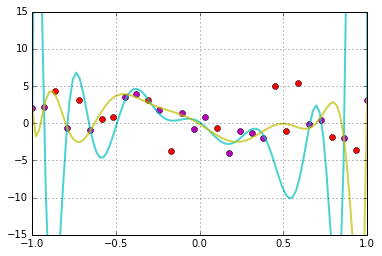

In [275]:
(x_train,y_train),(x_test,y_test) = gen_data(30)
plt.plot(x_train, y_train, 'mo')
plt.plot(x_test, y_test, 'ro')
plt.ylim([-15,15])

plt.grid(True)
nb_degree = 20

lr = LinearRegression(toNDegree(x_train,nb_degree), y_train)
lr.set_lamb(0)
lr.set_nb_degree(nb_degree)

ws = minimize(lr.cost, np.zeros(nb_degree), tol=1e-9)
# print 'minimize for poly', ws.x

overfitted_w = ws.x

lr.set_w(ws.x)
lr.drawlinepoly('c',.7)

expected_lamb = calc_lambda(x_train, y_train, overfitted_w, nb_degree)
print "expected lamb = ", expected_lamb

lr2 =  LinearRegression(toNDegree(x_train,nb_degree), y_train)
lr2.set_lamb(expected_lamb)
lr2.set_nb_degree(nb_degree)

ws2 = minimize(lr2.cost, np.zeros(nb_degree))
# print 'minimize for poly', ws2.x

lr2.set_w(ws2.x)
lr2.drawlinepoly('y',.7)

x_test_poly = toNDegree(x_test,nb_degree)
x_train_poly = toNDegree(x_train,nb_degree)

print ("mse1_train = ", sum([(np.dot(lr.w, x_train_poly[i]) - y_train[i])**2 for i in range(len(x_train_poly))]))
print ("mse2_train = ", sum([(np.dot(lr2.w, x_train_poly[i]) - y_train[i])**2 for i in range(len(x_train_poly))]))

print ("mse1_test = ", sum([(np.dot(lr.w, x_test_poly[i]) - y_test[i])**2 for i in range(len(x_test_poly))]))
print ("mse2_test = ", sum([(np.dot(lr2.w, x_test_poly[i]) - y_test[i])**2 for i in range(len(x_test_poly))]))